<a href="https://colab.research.google.com/github/mekiii/word2vec/blob/master/nietzsche_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Word2Vec model with Books of Nietzsche 
## 1. Preprocessing book content
For the text preprocessing I am using the python libraries spacy and nltk. For the main word2vec-model-training I use the gensim library. 

First I am installing the packages.

In [9]:
!pip install --upgrade gensim
from gensim.models import Word2Vec
!pip install -q kaggle
import os
import csv
import pandas as pd
!pip install nltk
import nltk  
nltk.download('punkt')
!pip install spacy
!spacy download en_core_web_md
import spacy
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
from time import time


Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.7.3)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I am loading and unzipping this file from kaggle

In [0]:
os.environ['KAGGLE_USERNAME'] = "mekong"
os.environ['KAGGLE_KEY'] = "652943d9e4e316e26c0ccd0f825a249d"

In [3]:
!kaggle datasets download -d hsankesara/books-of-friedrich-nietzsche

  0% 0.00/682k [00:00<?, ?B/s]
100% 682k/682k [00:00<00:00, 46.8MB/s]


In [4]:
!unzip books-of-friedrich-nietzsche.zip

Archive:  books-of-friedrich-nietzsche.zip
  inflating: The Birth of Tragedy.txt  
  inflating: The Antichrist.txt      
  inflating: Beyond good and Evil.txt  
  inflating: On the Genealogy of Morality.txt  
  inflating: Thus Spoke Zarathustra.txt  


In [97]:


f1 = open("Beyond good and Evil.txt", "r")
f2 = open("On the Genealogy of Morality.txt", "r")
f3 = open("The Antichrist.txt", "r")
f4 = open("The Birth of Tragedy.txt", "r")
f5 = open("Thus Spoke Zarathustra.txt", "r")
corpus = list()
corpus.append(f1.read())
corpus.append(f2.read()) 
corpus.append(f3.read())
corpus.append(f4.read()) 

print(len(corpus))



4


In [98]:
!pip install contractions
from contractions import CONTRACTION_MAP

In [14]:
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'You all cannot expand contractions I would think'

In [15]:
def remove_special_characters(text, remove_digits=true):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [16]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crashed yesterday , ours crash daily'

In [17]:
stopword_list = nltk.corpus.stopwords.words('english')

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer'

In [161]:
def remove_underscore(text):
  pattern = '_'
  text = re.sub(pattern, '', text)
  return text

remove_underscore("Hello (laughter ___!)__!")

'Hello (laughter !)!'

In [162]:
for num, row in enumerate(corpus):
  corpus[num] = expand_contractions(corpus[num])
  corpus[num] = remove_stopwords(corpus[num])
  corpus[num] = remove_underscore(corpus[num])
print(corpus[1])

﻿1 . unknown , knower , : good reason . never search -- come pass , ever  find  ? rightly say : " treasure , heart also . "   treasure , stand hive knowledge . hive always strive ; bear creature flight , honey - gatherer spirit , care really heart one thing -- bring something " home hive ! " far rest life - call " experience " concerned , us even sufficient serious interest ? sufficient time ? dealing point life , , fear , never properly point ; precise , heart , certainly ear . rather like one , delighting divine distraction , sink sea soul , whose ear clock thunder force twelve stroke noon , suddenly wake , ask , " point fact strike ? " time rub afterwards , , puzzle ear , ask complete astonishment complete embarrassment , " point fact live ? " , " point fact ? " count ,  strike  , explain , twelve throb beat clock experience , life , -- ah ! -- count wrong endeavour . necessity remain stranger , understand , bind mistaken , us hold good eternity motto , " one farth away " -- far con

In [163]:
for num, row in enumerate(corpus):
  corpus[num] = lemmatize_text(corpus[num])
print(corpus[1])

﻿1 . unknown , knower , : good reason . never search -- come pass , ever   find   ? rightly say : " treasure , heart also . "    treasure , stand hive knowledge . hive always strive ; bear creature flight , honey - gatherer spirit , care really heart one thing -- bring something " home hive ! " far rest life - call " experience " concerned , us even sufficient serious interest ? sufficient time ? deal point life , , fear , never properly point ; precise , heart , certainly ear . rather like one , delighting divine distraction , sink sea soul , whose ear clock thunder force twelve stroke noon , suddenly wake , ask , " point fact strike ? " time rub afterwards , , puzzle ear , ask complete astonishment complete embarrassment , " point fact live ? " , " point fact ? " count ,   strike   , explain , twelve throb beat clock experience , life , -- ah ! -- count wrong endeavour . necessity remain strange , understand , bind mistaken , us hold good eternity motto , " one farth away " -- far co

In [165]:
#Check if it was lemmatized
print(corpus[1])

﻿1 . unknown , knower , : good reason . never search -- come pass , ever   find   ? rightly say : " treasure , heart also . "    treasure , stand hive knowledge . hive always strive ; bear creature flight , honey - gatherer spirit , care really heart one thing -- bring something " home hive ! " far rest life - call " experience " concerned , us even sufficient serious interest ? sufficient time ? deal point life , , fear , never properly point ; precise , heart , certainly ear . rather like one , delighting divine distraction , sink sea soul , whose ear clock thunder force twelve stroke noon , suddenly wake , ask , " point fact strike ? " time rub afterwards , , puzzle ear , ask complete astonishment complete embarrassment , " point fact live ? " , " point fact ? " count ,   strike   , explain , twelve throb beat clock experience , life , -- ah ! -- count wrong endeavour . necessity remain strange , understand , bind mistaken , us hold good eternity motto , " one farth away " -- far co

In [0]:
sentences = list()
for num, row in enumerate(corpus):
  sentences.extend(re.split('[?!.:]', corpus[num]))

In [167]:
print(len(sentences))
sentences[2]

9228


' truth , tempt us many hazardous enterprise , famous Truthfulness philosopher hitherto speak respect , question truth lie us '

In [0]:
for num, sent in enumerate(sentences):
  sentences[num] = remove_special_characters(sentences[num])

In [0]:
for num, sent in enumerate(sentences):
  sentences[num] = remove_stopwords(sentences[num])

In [170]:
print(len(sentences))
print(sentences[2])

9228
truth tempt us many hazardous enterprise famous Truthfulness philosopher hitherto speak respect question truth lie us


In [0]:

for num, sent in enumerate(sentences):
  sentences[num] = nltk.word_tokenize(sentences[num])

In [172]:
from collections import defaultdict  # For word frequency
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
print(len(word_freq))
sorted(word_freq, key=word_freq.get, reverse=True)[:25]

12653


['one',
 'man',
 'even',
 'us',
 'world',
 'life',
 'every',
 'must',
 'make',
 'good',
 'say',
 'time',
 'may',
 'also',
 'thing',
 'great',
 'would',
 'art',
 'mean',
 'work',
 'like',
 'self',
 'know',
 'perhaps',
 'still']

## 2. Train the model

We will be using the word2vec model from Gensim. In this case I used the approach described in this tutorial:
https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

The parameters are described as follows:

- **min_count** = int - Ignores all words with total absolute frequency lower than this - (2, 100)
- **window** = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the - left and window words on the left of our target - (2, 10)
- **size** = int - Dimensionality of the feature vectors. - (50, 300)
- **sample** = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)
- **alpha** = float - The initial learning rate - (0.01, 0.05)
- **min_alpha** = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00
- **negative** = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be -drown. If set to 0, no negative sampling is used. - (5, 20)
- **workers** = int - Use these many worker threads to train the model (=faster training with multicore machines)


In [204]:
import multiprocessing
cores = multiprocessing.cpu_count()

w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=10,
                     sample=3e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

WARNING - 13:35:35: consider setting layer size to a multiple of 4 for greater performance


In [205]:
t = time()
w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:35:38: collecting all words and their counts
INFO - 13:35:38: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:35:38: collected 12653 word types from a corpus of 99905 raw words and 9228 sentences
INFO - 13:35:38: Loading a fresh vocabulary
INFO - 13:35:38: effective_min_count=20 retains 951 unique words (7% of original 12653, drops 11702)
INFO - 13:35:38: effective_min_count=20 leaves 63548 word corpus (63% of original 99905, drops 36357)
INFO - 13:35:38: deleting the raw counts dictionary of 12653 items
INFO - 13:35:38: sample=3e-05 downsamples 951 most-common words
INFO - 13:35:38: downsampling leaves estimated 11598 word corpus (18.3% of prior 63548)
INFO - 13:35:38: estimated required memory for 951 words and 10 dimensions: 551580 bytes
INFO - 13:35:38: resetting layer weights


Time to build vocab: 0.0 mins


In [206]:
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=20, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 13:35:40: training model with 1 workers on 951 vocabulary and 10 features, using sg=0 hs=0 sample=3e-05 negative=20 window=2
INFO - 13:35:40: worker thread finished; awaiting finish of 0 more threads
INFO - 13:35:40: EPOCH - 1 : training on 99905 raw words (11461 effective words) took 0.1s, 189531 effective words/s
INFO - 13:35:40: worker thread finished; awaiting finish of 0 more threads
INFO - 13:35:40: EPOCH - 2 : training on 99905 raw words (11690 effective words) took 0.1s, 201434 effective words/s
INFO - 13:35:40: worker thread finished; awaiting finish of 0 more threads
INFO - 13:35:40: EPOCH - 3 : training on 99905 raw words (11550 effective words) took 0.1s, 191818 effective words/s
INFO - 13:35:40: worker thread finished; awaiting finish of 0 more threads
INFO - 13:35:40: EPOCH - 4 : training on 99905 raw words (11587 effective words) took 0.1s, 216186 effective words/s
INFO - 13:35:40: worker thread finished; awaiting finish of 0 more threads
INFO - 13:35:40: EPOCH - 

Time to train the model: 0.02 mins


In [212]:
w2v_model.most_similar(positive=['philosophy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('annihilation', 0.9998081922531128),
 ('go', 0.9997902512550354),
 ('Euripides', 0.9996523857116699),
 ('discipline', 0.9995453953742981),
 ('tone', 0.9995104074478149),
 ('turn', 0.9995028376579285),
 ('triumph', 0.9994423389434814),
 ('mystery', 0.9994282126426697),
 ('impossible', 0.9993764758110046),
 ('explanation', 0.999366283416748)]

In [190]:
w2v_model.most_similar(positive=['nature'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('friend', 0.9995553493499756),
 ('copy', 0.9994921684265137),
 ('many', 0.9994872808456421),
 ('influence', 0.9994536638259888),
 ('origin', 0.9994145631790161),
 ('dionysian', 0.9993742108345032),
 ('respect', 0.9993284940719604),
 ('general', 0.9992491006851196),
 ('well', 0.9992117285728455),
 ('person', 0.9992014169692993)]

In [191]:
#save model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
w2v_model.save('/content/drive/My Drive/Colab Notebooks/nietzsche-20size.model')

INFO - 13:27:14: saving Word2Vec object under /content/drive/My Drive/Colab Notebooks/nietzsche-20size.model, separately None
INFO - 13:27:14: not storing attribute vectors_norm
INFO - 13:27:14: not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
INFO - 13:27:14: saved /content/drive/My Drive/Colab Notebooks/nietzsche-20size.model


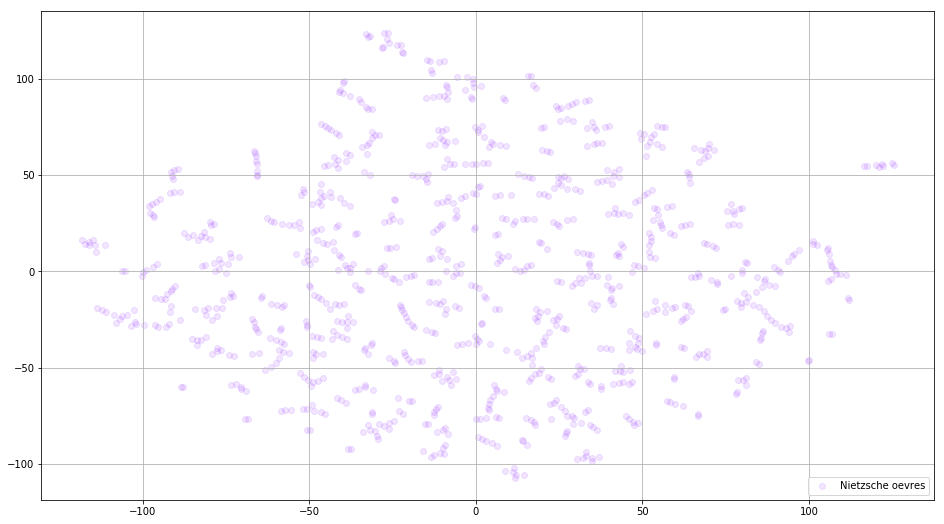

In [208]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline

words_ak = []
embeddings_ak = []
for word in list(w2v_model.wv.vocab):
    embeddings_ak.append(w2v_model.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Nietzsche oevres', embeddings_ak_2d, a=0.1)

In [209]:
keys = ['life', 'love', 'philosophy']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_model.most_similar(word, topn=40):
        words.append(similar_word)
        embeddings.append(w2v_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


WARNING - 13:36:48: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
WARNING - 13:36:48: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
WARNING - 13:36:48: 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


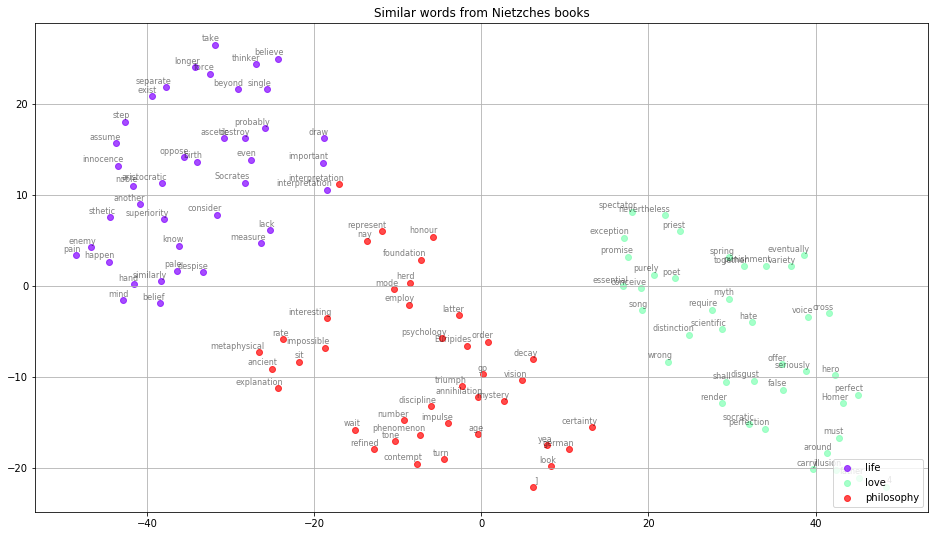

In [211]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Nietzches books', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


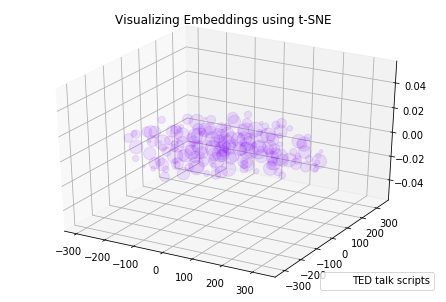

In [203]:
words_wp = []
embeddings_wp = []
for word in list(w2v_model.wv.vocab):
    embeddings_wp.append(w2v_model.wv[word])
    words_wp.append(word)

tsne_wp_3d = TSNE(perplexity=10, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'TED talk scripts', embeddings_wp_3d, a=0.1)

# Get already trained and saved model
Get the model you already saved 

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:

from gensim.models import Word2Vec
model = Word2Vec.load("/content/drive/My Drive/Colab Notebooks/word2vec-50size.model")

In [0]:
model.most_similar(positive=['inspiration'])

In [0]:
model.most_similar(positive=['marriage'], negative=['sex'])

# Fazit
Disappointing, that man just builds too long sentences, hence the most similar words just represent how long it takes for that man to describe a word. 